
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


At the end of the experiment, you will be able to:

* Understand and implement SVM algorithm to classify the given dataset
* Understand and Apply the Kernels

## Dataset



###Description

In this experiment we will use  make_blobs and dataset from sklearn. The points in the Blobs dataset follows gaussian distrubution and they are  mainly used for linear classification problems.


The make_circles() function generates a binary classification problem with datasets that fall into concentric circles. This function is suitable for algorithms that can learn complex non-linear manifolds





## AI / ML Technique



###SVM



In this experiment we are using SVM.  SVM has been explained in detail in the  **Reading material **.

**Below is a quick overview of SVM.**

* SVM assumes that the data is lineraly separable.

* It chooses the line which is more distant from both the classes.

In SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. We compute the distance between the line and the support vectors which is called as the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is called optimal hyperplane.

![alttxt](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/svm.png)




## Kernels



##Kernel

In this experiment we are using Kernels. This has been explained in detail in the **Reading material **. 


The kernel  means transforming data into another dimension that has a clear dividing margin between classes of data as shown in the below image.

![alttxt](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/kernel.png)




We will be performing following actions in this experiment :

    1. Generating the dataset 
    2. Attempting to draw a straight line separating the two sets of data
    3. Maximizing the Margin
    4. Trying to fit the model
    5. Visualizing the decision boundaries
    

### Importing required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

### Generating the dataset 

Considering the simple case of a classification task, in which the two classes of points are well separated.

In [0]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [0]:
# Checking the length of X, y
X.shape , y.shape

((50, 2), (50,))

To get sense of the data, lets visualize the data

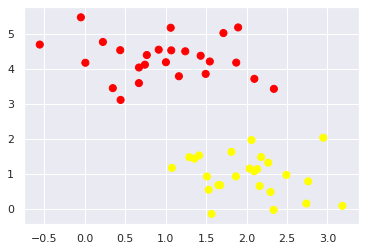

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Attempting to draw a straight line separating the two sets of data.

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby creating a model for classification. 

For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes. We can draw them as follows:

Let us choose a new point and visualize the point.

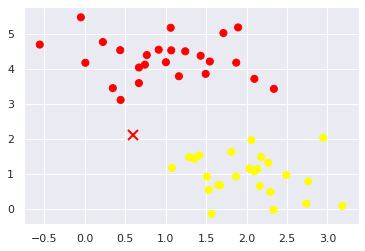

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
plt.show()

0.65
1.6
2.9


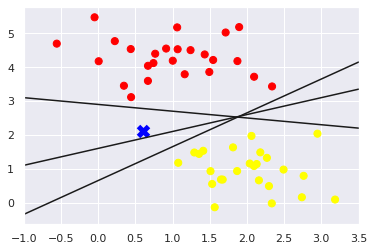

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=5, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  #print (m)
  print (b)
  plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);

These are three different separators which discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! 

**Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper?**

### Maximizing the Margin

Support vector machines offer one way to improve on this. 

The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

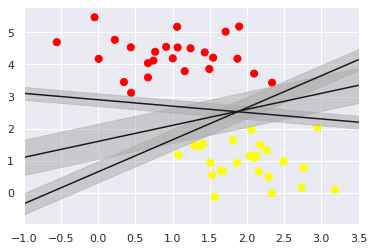

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.5)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is  the optimal model. Support vector machines are an example of such a maximum margin estimator.

### Trying to fit the model

We will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the Regularization(C) parameter to a very large number.

In [0]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Visualizing the decision boundaries

Let us define a function to plot the decision boundaries of SVM

In [0]:
def plot_decision_boundaries(model, ax=None, plot_support=True):
    
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Let us try to call the above function by passing the trained model to observe the decision boundaries

(-0.7541740493109252, 3.3838081780236036)


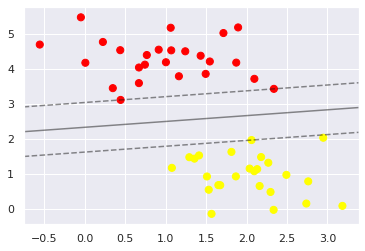

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin. 
These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. 

In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [0]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

(-1.0, 4.0)
(-1.0, 4.0)


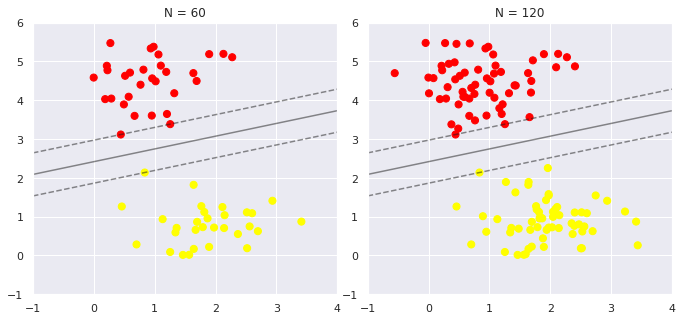

In [0]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_decision_boundaries(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

## Kernels

In [0]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)

To get sense of the data, let us visualize the data

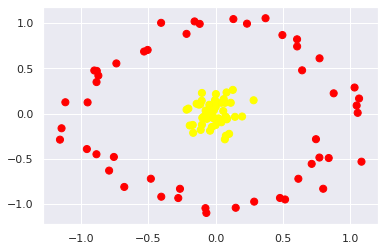

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

### Trying to fit the model using Linear Kernel

In [0]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let us visualize the decision boundaries of the data

(-1.279615652369787, 1.2056224046588098)


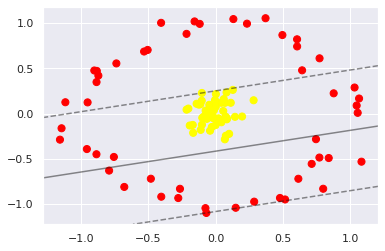

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf, plot_support=False);

Form above plot we can observe that no linear discrimination will ever be able to separate this data. 

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting N points into N dimensions—is that it might become very computationally intensive as N grows large. However, because of a neat little procedure known as the kernel trick, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full N-dimensional representation of the kernel projection! 

### Trying to fit the model using RBF Kernel

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [0]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(-1.279615652369787, 1.2056224046588098)


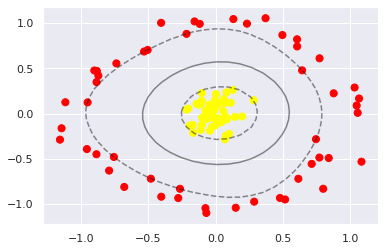

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

So far we have centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

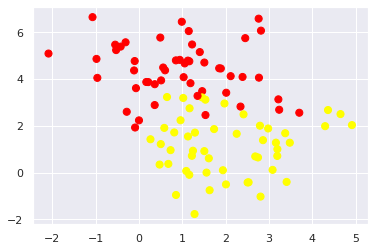

In [0]:
X, y = make_blobs(n_samples = 100, centers = 2,
                  random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

## Tuning the SVM parameter (C)

So far we have centered around very clean datasets, in which a perfect decision boundary exists. But what if your data has some amount of overlap? For example, you may have data like this:

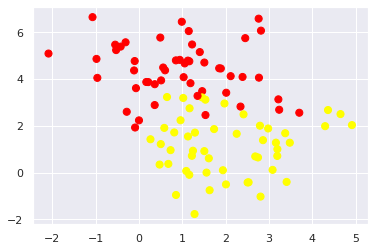

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as C. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.

Let us visualize the picture of how a changing C parameter affects the final fit, via the softening of the margin:


(-2.445423796830413, 5.273147347645621)
(-2.4454237968304127, 5.273147347645621)


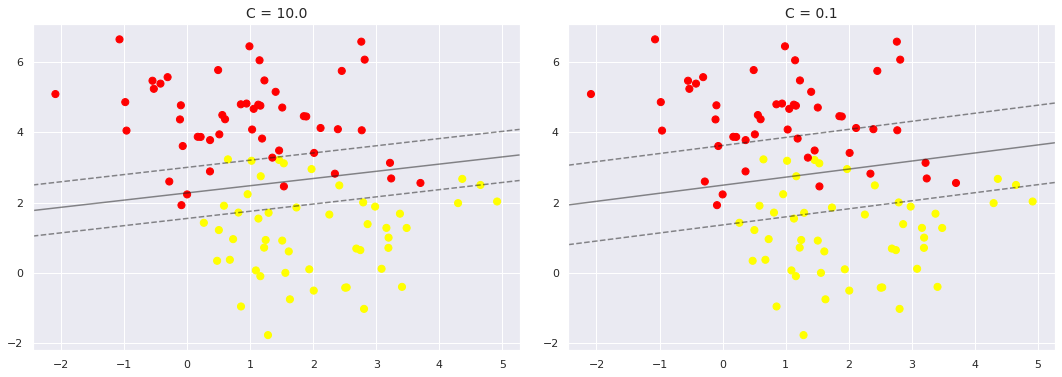

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

(-2.445423796830413, 5.273147347645621)
(-2.4454237968304127, 5.273147347645621)


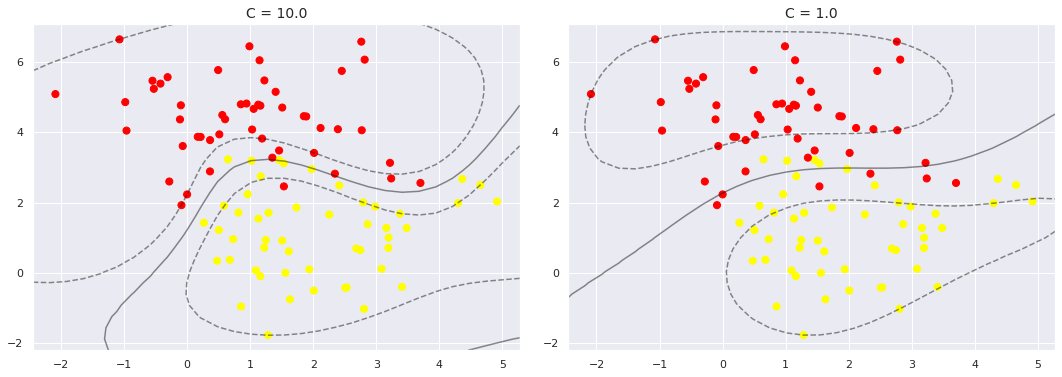

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_decision_boundaries(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [0]:
model.support_vectors_

array([[-8.90728186e-02,  1.92683157e+00],
       [ 1.53506501e+00,  2.46029490e+00],
       [ 1.03118030e+00,  4.07916671e+00],
       [ 5.11477898e-01,  3.94102403e+00],
       [ 1.69317541e-01,  3.87232353e+00],
       [ 9.88870103e-01,  6.44683192e+00],
       [ 2.39080556e+00,  4.08787752e+00],
       [ 2.34355090e+00,  2.82199634e+00],
       [-2.81993480e-01,  2.59976580e+00],
       [ 2.81560514e+00,  6.06701785e+00],
       [-1.07125415e+00,  6.64471780e+00],
       [ 1.45908005e+00,  3.48201522e+00],
       [-9.79967938e-01,  4.85912603e+00],
       [ 2.76217271e+00,  6.57885434e+00],
       [ 3.69997563e+00,  2.55854852e+00],
       [ 3.23605092e+00,  2.68647645e+00],
       [ 2.11637618e+00,  4.12215868e+00],
       [-6.86865005e-02,  3.60916773e+00],
       [ 3.21733967e+00,  3.13105387e+00],
       [ 2.01359352e+00,  3.41318930e+00],
       [ 1.35195132e+00,  3.27887244e+00],
       [ 1.85117875e+00,  4.45856682e+00],
       [ 4.94540093e-04,  2.23224820e+00],
       [ 2.

## Summary

<ol>
<li> Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.</li>
<li>Once the model is trained, the prediction phase is very fast.</li>
<li>Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.</li>
<li>Their integration with kernel methods makes them very versatile, able to adapt to many types of data.</li>
</ol>

     

However, SVMs have several disadvantages as well:


<ol>
<li> The scaling with the number of samples N is [N3] at worst, or [N2] for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.</li>
<li> The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.</li>
<li> The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation</li>
</ol>

#### Acknowledgement :  Python Data Science Handbook by Jake VanderPlas